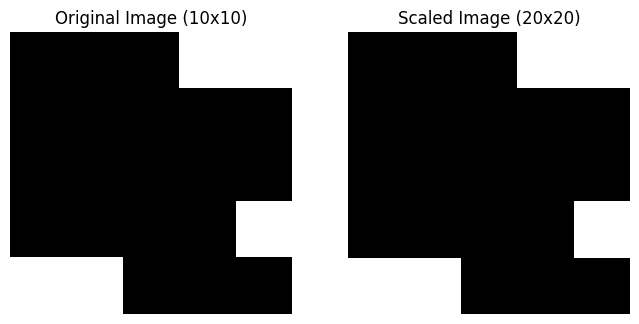

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def scale_image_np(image, scale_factor):
    original_height, original_width = image.shape
    scaled_image = np.zeros((original_height * scale_factor, original_width * scale_factor), dtype=image.dtype)
    
    for i in range(original_height):
        for j in range(original_width):
            scaled_image[i * scale_factor:(i + 1) * scale_factor, j * scale_factor:(j + 1) * scale_factor] = image[i, j]
    
    return scaled_image

original_image = np.random.randint(0, 2, (5, 5))
scaled_image = scale_image_np(original_image, scale_factor=2)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray', interpolation='nearest')
plt.title('Original Image (10x10)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(scaled_image, cmap='gray', interpolation='nearest')
plt.title('Scaled Image (20x20)')
plt.axis('off')
plt.show()


$$
I'(x', y') = \sum_{i=0}^{1} \sum_{j=0}^{1} I(x_i, y_j) \cdot (1 - |x' - x_i|) \cdot (1 - |y' - y_j|)
$$

where:
- \( I \) is the original image,
- \( I' \) is the scaled image,
- \( (x', y') \) are the coordinates in the scaled image,
- \( (x_i, y_j) \) are the coordinates in the original image.

This formula calculates the pixel value at \( (x', y') \) in the scaled image by taking a weighted sum of the four nearest pixel values from the original image.

If you need more details or a specific example, feel free to ask!

In [2]:
from PIL import Image
import numpy as np


def show(image, grid=True, cmap='gray', title=None, fontsize=12):
    if image.shape[1] > 10:
        plt.figure(figsize=(25, 10))
    plt.imshow(image, cmap=cmap, interpolation='nearest', vmin=0, vmax=1)
    if grid:
        rotation = 0
        if image.shape[1] > 10:
            rotation = 90
        plt.xticks(
            np.arange(0.5, image.shape[1], 1),
            labels=np.arange(1, image.shape[1] + 1),
            rotation=rotation
        )
        plt.yticks(np.arange(0.5, image.shape[0], 1), labels=np.arange(image.shape[0])[::-1])
        plt.grid(which='both', color='grey', linestyle='--', linewidth=1)
    else:
        plt.axis('off')
    if title is not None:
        plt.title(title, fontsize=fontsize)
    plt.show()


def open_and_resize_image(file_path, width, height):
    image = Image.open(file_path)
    image = image.resize((width, height))
    return np.array(image) / 255


def convert_to_grayscale(image_array):
    return np.dot(image_array[..., :3], [0.2989, 0.5870, 0.1140])


def convert_to_latex_matrix(array):
    latex_matrix = "$\n\\begin{bmatrix}\n"
    for row in array:
        latex_row = ' & '.join(map(str, row))
        latex_matrix += f"{latex_row} \\\\\n"
    latex_matrix += "\\end{bmatrix}\n$"
    print(latex_matrix)


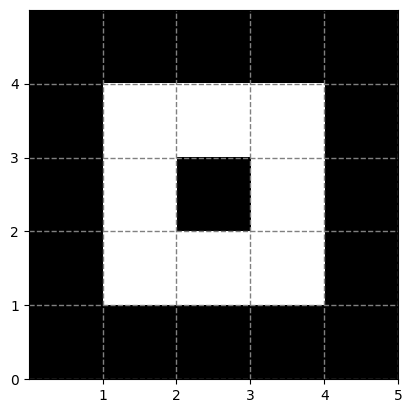

In [3]:
image = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0]
    ]
)
show(image)

$$
A = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 1 & 0 & 1 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$



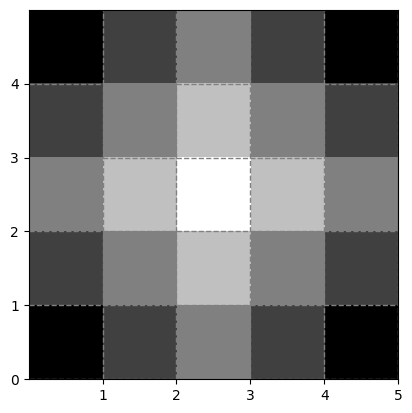

In [4]:
grayscale_image = np.array(
    [
        [0.00, 0.25, 0.50, 0.25, 0.00],
        [0.25, 0.50, 0.75, 0.50, 0.25],
        [0.50, 0.75, 1.00, 0.75, 0.50],
        [0.25, 0.50, 0.75, 0.50, 0.25],
        [0.00, 0.25, 0.50, 0.25, 0.00]
    ]
)
show(grayscale_image)

In [5]:
convert_to_latex_matrix(grayscale_image)

$
\begin{bmatrix}
0.0 & 0.25 & 0.5 & 0.25 & 0.0 \\
0.25 & 0.5 & 0.75 & 0.5 & 0.25 \\
0.5 & 0.75 & 1.0 & 0.75 & 0.5 \\
0.25 & 0.5 & 0.75 & 0.5 & 0.25 \\
0.0 & 0.25 & 0.5 & 0.25 & 0.0 \\
\end{bmatrix}
$


$
A = \begin{bmatrix}
0.0 & 0.25 & 0.5 & 0.25 & 0.0 \\
0.25 & 0.5 & 0.75 & 0.5 & 0.25 \\
0.5 & 0.75 & 1.0 & 0.75 & 0.5 \\
0.25 & 0.5 & 0.75 & 0.5 & 0.25 \\
0.0 & 0.25 & 0.5 & 0.25 & 0.0 \\
\end{bmatrix}
$

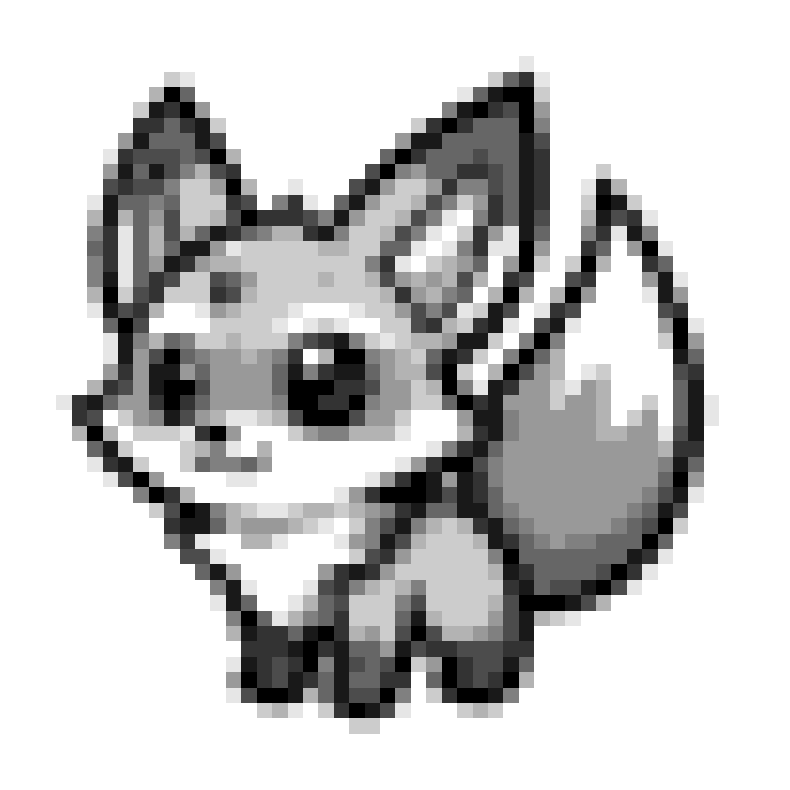

In [6]:
grayscale_image_medium = convert_to_grayscale(open_and_resize_image('medium_example.png', 50, 50)).round(1)
show(grayscale_image_medium, grid=False)

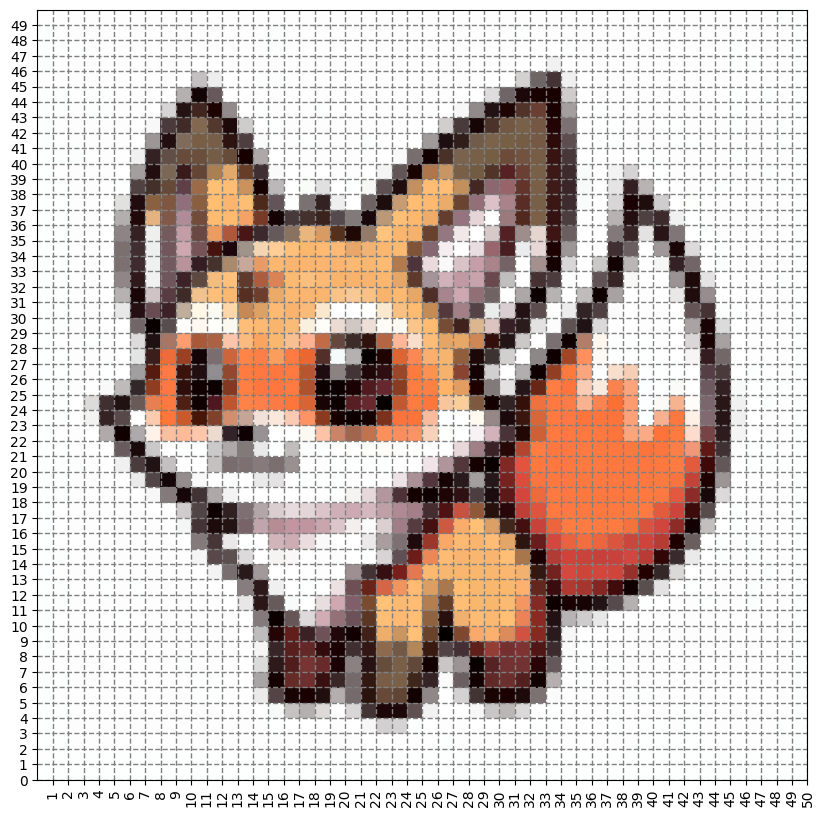

In [7]:
show(open_and_resize_image('medium_example.png', 50, 50), grid=True)

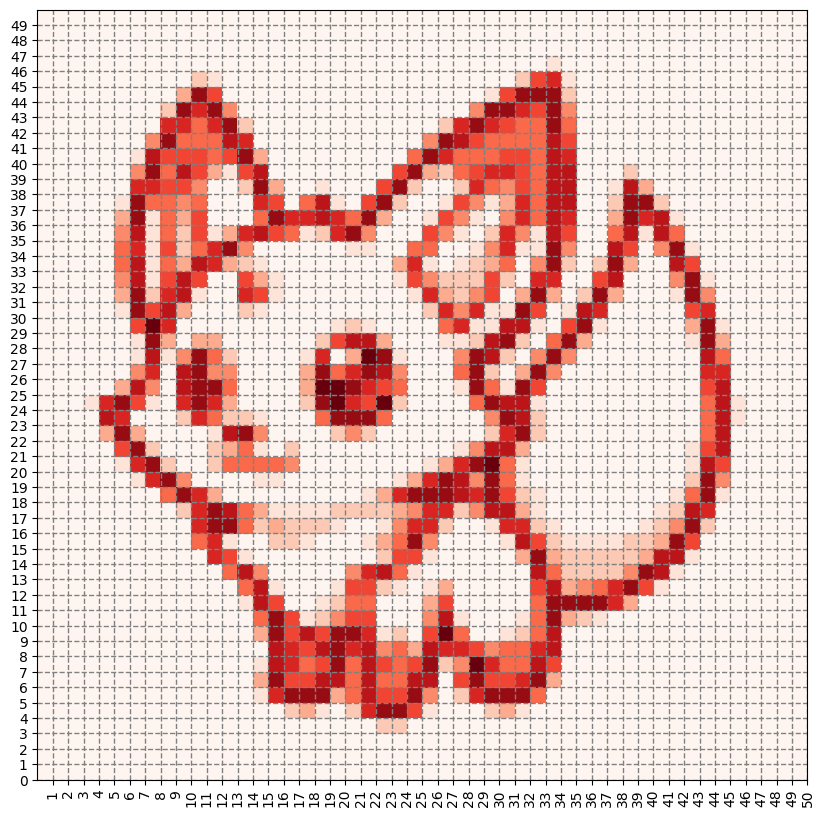

In [8]:
red_image_medium = open_and_resize_image('medium_example.png', 50, 50)[:, :, 0].round(1)
show(1 - red_image_medium, cmap='Reds')

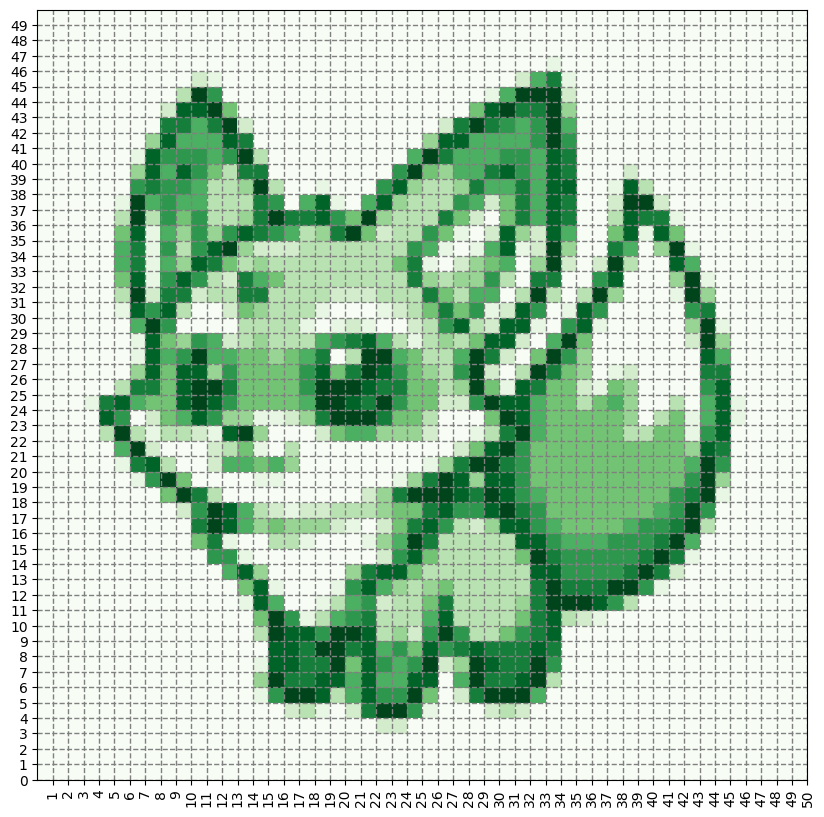

In [9]:
green_image_medium = open_and_resize_image('medium_example.png', 50, 50)[:, :, 1].round(1)
show(1 - green_image_medium, cmap='Greens')

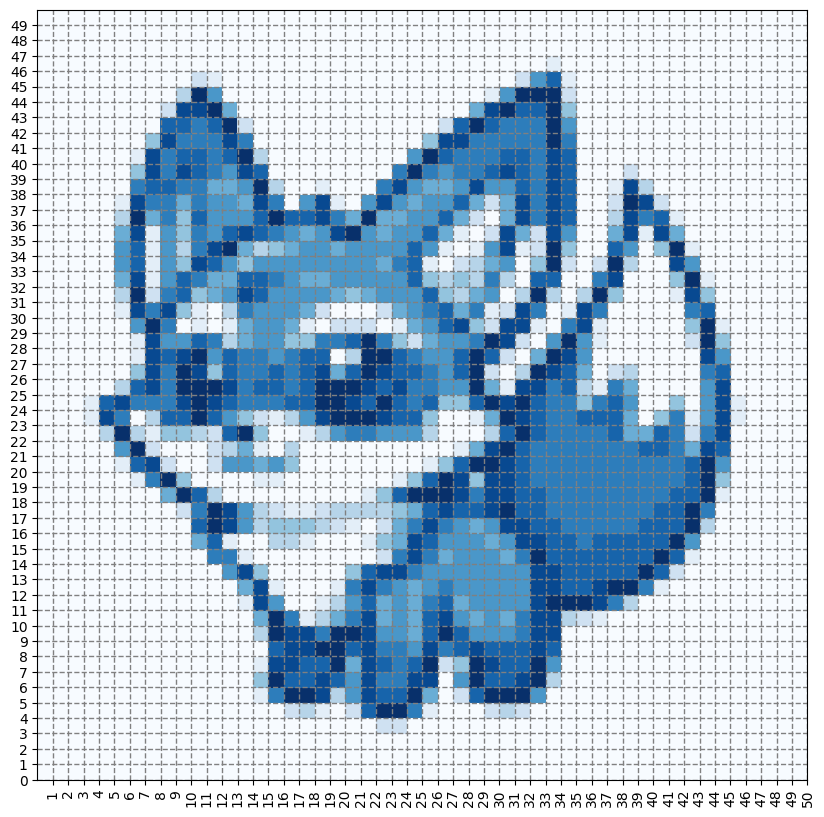

In [10]:
blue_image_medium = open_and_resize_image('medium_example.png', 50, 50)[:, :, 2].round(1)
show(1 - blue_image_medium, cmap='Blues')


$
A^{\prime} = \max(0, \min(A + \Delta, 1))
$


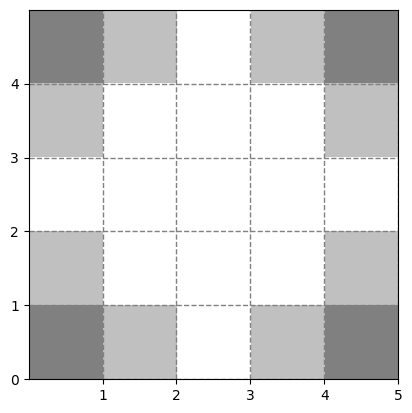

In [11]:
show(np.clip(grayscale_image + 0.5, 0, 1))

$
A^{\prime} = 
\begin{bmatrix}
0.5 & 0.75 & 1.0 & 0.75 & 0.5 \\
0.75 & 1.0 & 1.0 & 1.0 & 0.75 \\
1.0 & 1.0 & 1.0 & 1.0 & 1.0 \\
0.75 & 1.0 & 1.0 & 1.0 & 0.75 \\
0.5 & 0.75 & 1.0 & 0.75 & 0.5 \\
\end{bmatrix}
$


In [12]:
convert_to_latex_matrix(np.clip(grayscale_image + 0.5, 0, 1))

$
\begin{bmatrix}
0.5 & 0.75 & 1.0 & 0.75 & 0.5 \\
0.75 & 1.0 & 1.0 & 1.0 & 0.75 \\
1.0 & 1.0 & 1.0 & 1.0 & 1.0 \\
0.75 & 1.0 & 1.0 & 1.0 & 0.75 \\
0.5 & 0.75 & 1.0 & 0.75 & 0.5 \\
\end{bmatrix}
$


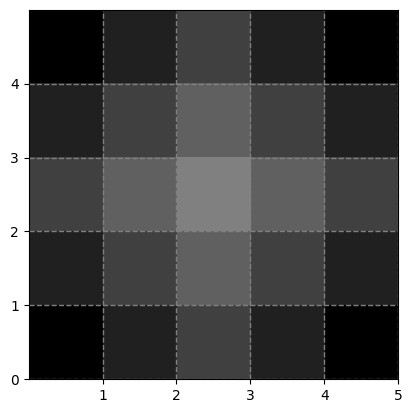

In [13]:
show(np.clip(grayscale_image * 0.5, 0, 1))

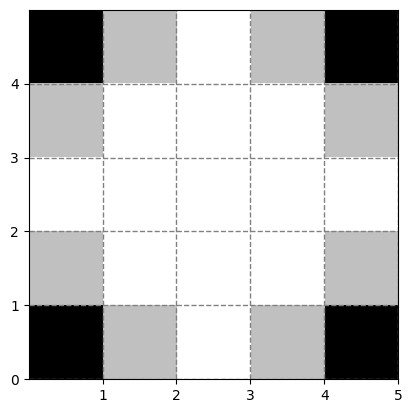

In [14]:
show(np.clip(grayscale_image * 3, 0, 1))

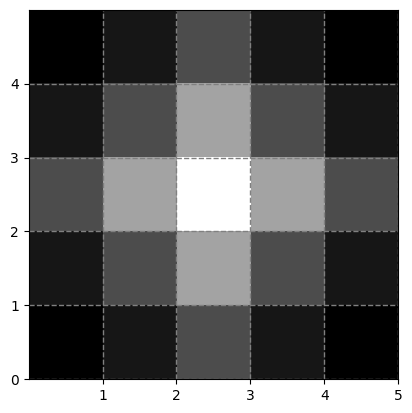

In [15]:
show((grayscale_image + 0.1) * grayscale_image)

To mathematically denote a stack of three 2D matrices \( R \), \( G \), and \( B \), we can represent them as a 3D array. In LaTeX, this can be expressed as follows:

$
\mathbf{A} = \begin{bmatrix}
R \\
G \\
B
\end{bmatrix}
$

Here, $ \mathbf{A} $ represents the 3D array (or stack) of the matrices, where each matrix \( R \), \( G \), and \( B \) is a 2D matrix. If you want to specify the dimensions of each matrix, you can denote them as \( R \in \mathbb{R}^{m \times n} \), \( G \in \mathbb{R}^{m \times n} \), and \( B \in \mathbb{R}^{m \times n} \), where \( m \) is the number of rows and \( n \) is the number of columns. 

Thus, the complete notation can be:

$
\mathbf{A} = \begin{bmatrix}
R \in \mathbb{R}^{m \times n} \\
G \in \mathbb{R}^{m \times n} \\
B \in \mathbb{R}^{m \times n}
\end{bmatrix}
$
$
\text{where m and n are dimensions of the digital image}
$

# Contrast



$$
A' = \min[(A - 0.5) \cdot k + 0.5, 1]
$$

$$where$$

$$
k \in \mathbb{R} \cap [0, +\infty)
$$


$$A^{\prime} = \min[(A - 0.5) * k^{s} + 0.5, 1]$$
$$where$$

$$
k \in \mathbb{R} \cap [1, +\infty)
$$
$$s \in \{-1; 1\}$$

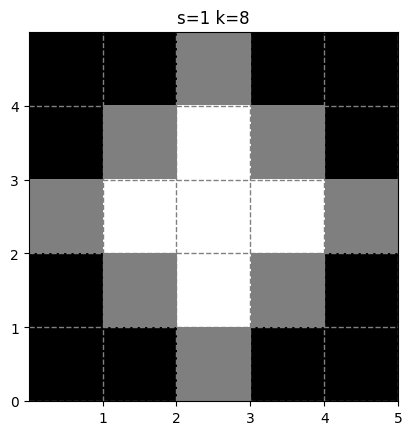

In [16]:
k = 8
s = 1
show((grayscale_image - 0.5) * k**s + 0.5, title=f's={s} k={k}')

In [17]:
k, s = 8, -1
convert_to_latex_matrix(((grayscale_image - 0.5) * k**s + 0.5).clip(0, 1).round(2))

$
\begin{bmatrix}
0.44 & 0.47 & 0.5 & 0.47 & 0.44 \\
0.47 & 0.5 & 0.53 & 0.5 & 0.47 \\
0.5 & 0.53 & 0.56 & 0.53 & 0.5 \\
0.47 & 0.5 & 0.53 & 0.5 & 0.47 \\
0.44 & 0.47 & 0.5 & 0.47 & 0.44 \\
\end{bmatrix}
$


$
A^{\prime} = 
\begin{bmatrix}
0.44 & 0.47 & 0.5 & 0.47 & 0.44 \\
0.47 & 0.5 & 0.53 & 0.5 & 0.47 \\
0.5 & 0.53 & 0.56 & 0.53 & 0.5 \\
0.47 & 0.5 & 0.53 & 0.5 & 0.47 \\
0.44 & 0.47 & 0.5 & 0.47 & 0.44 \\
\end{bmatrix}
$


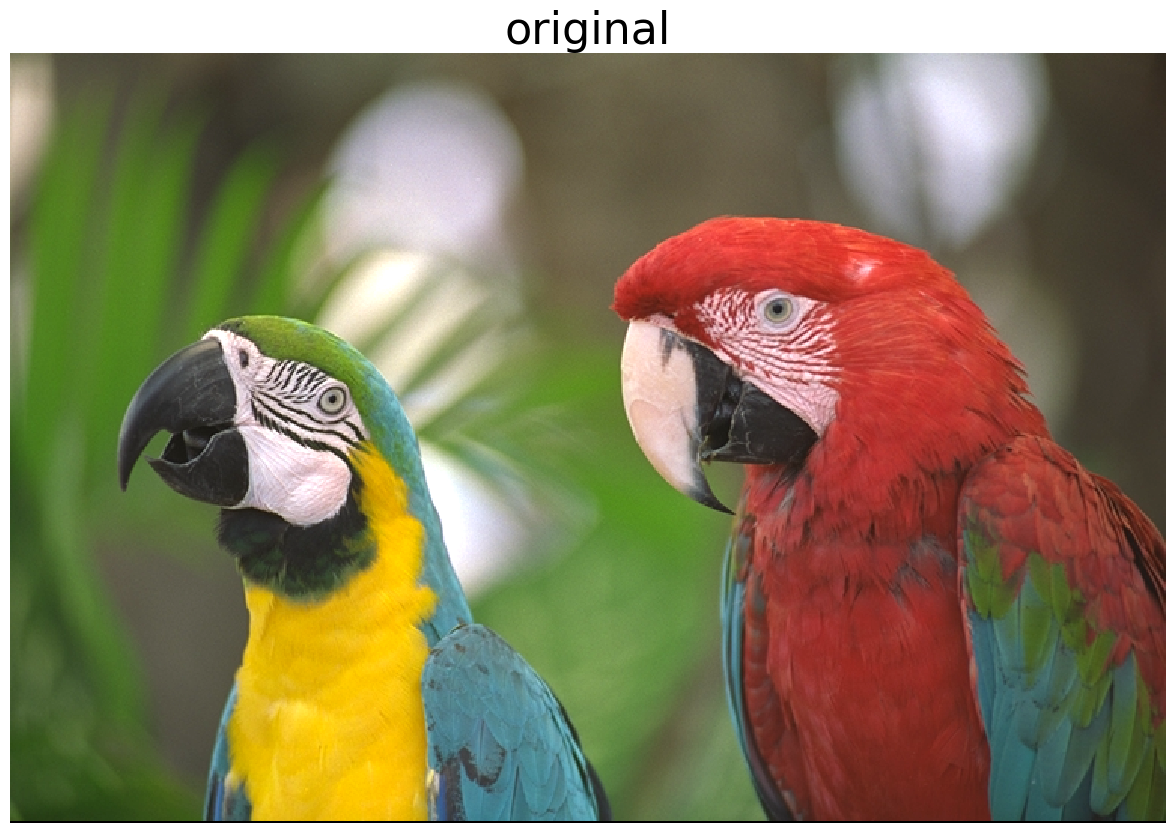

In [18]:
kodim23 = open_and_resize_image('kodim23.png', 768, 512)
show(kodim23, grid=False, title='original', fontsize=32)

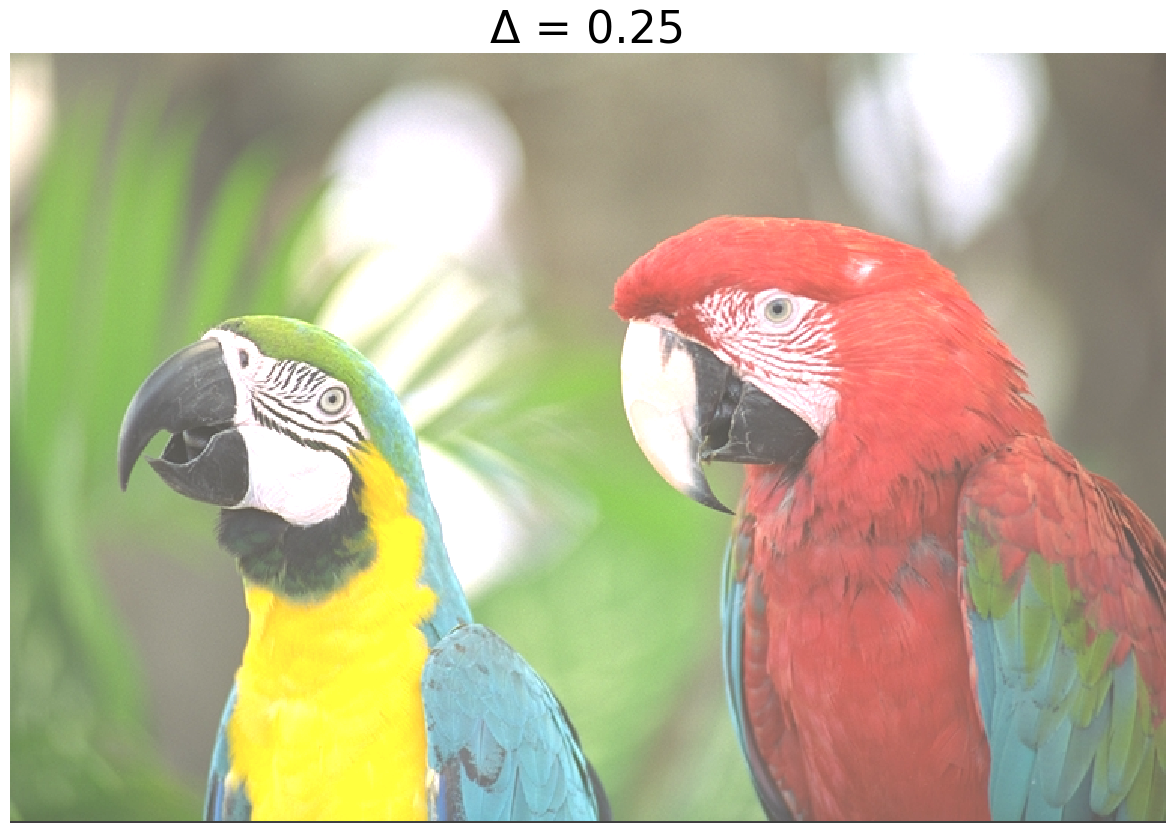

In [19]:
show((kodim23 + 0.25).clip(0, 1), grid=False, title='Δ = 0.25', fontsize=32)

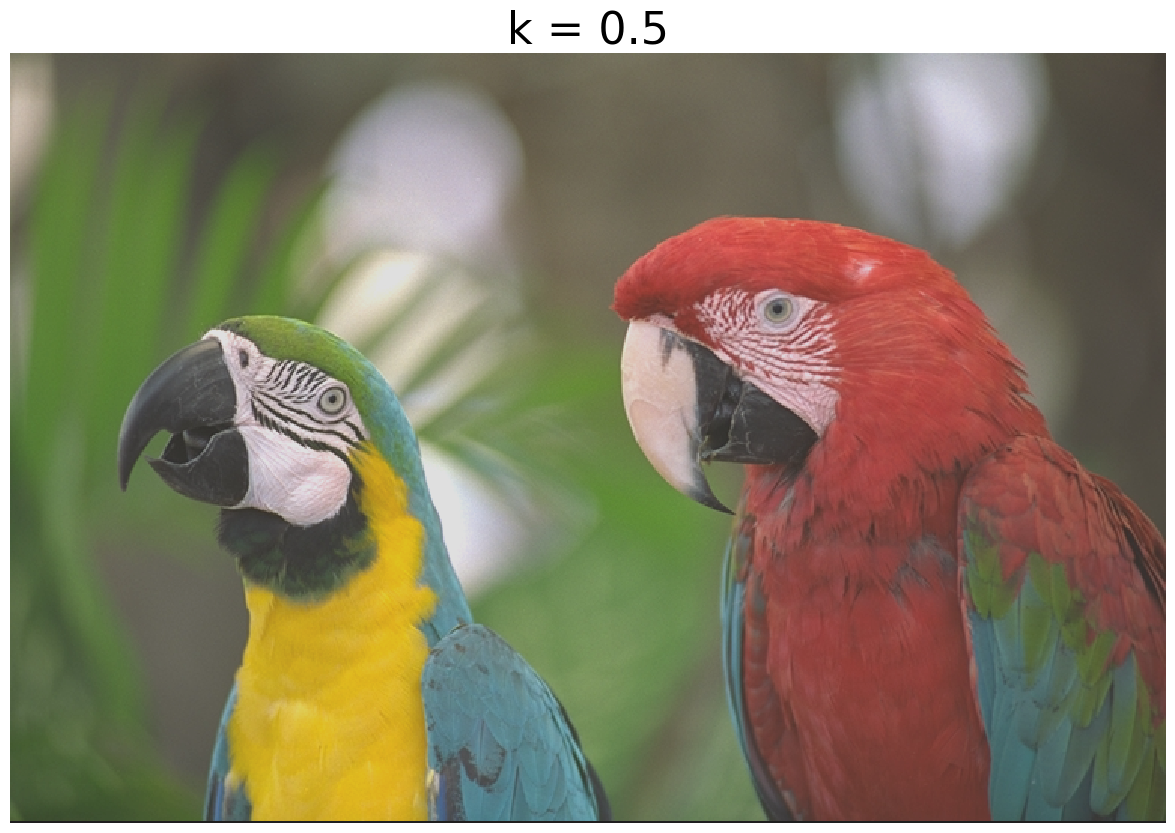

In [20]:
show(((kodim23 - 0.5) * 0.75 + 0.5).clip(0, 1), grid=False, title='k = 0.5', fontsize=32)

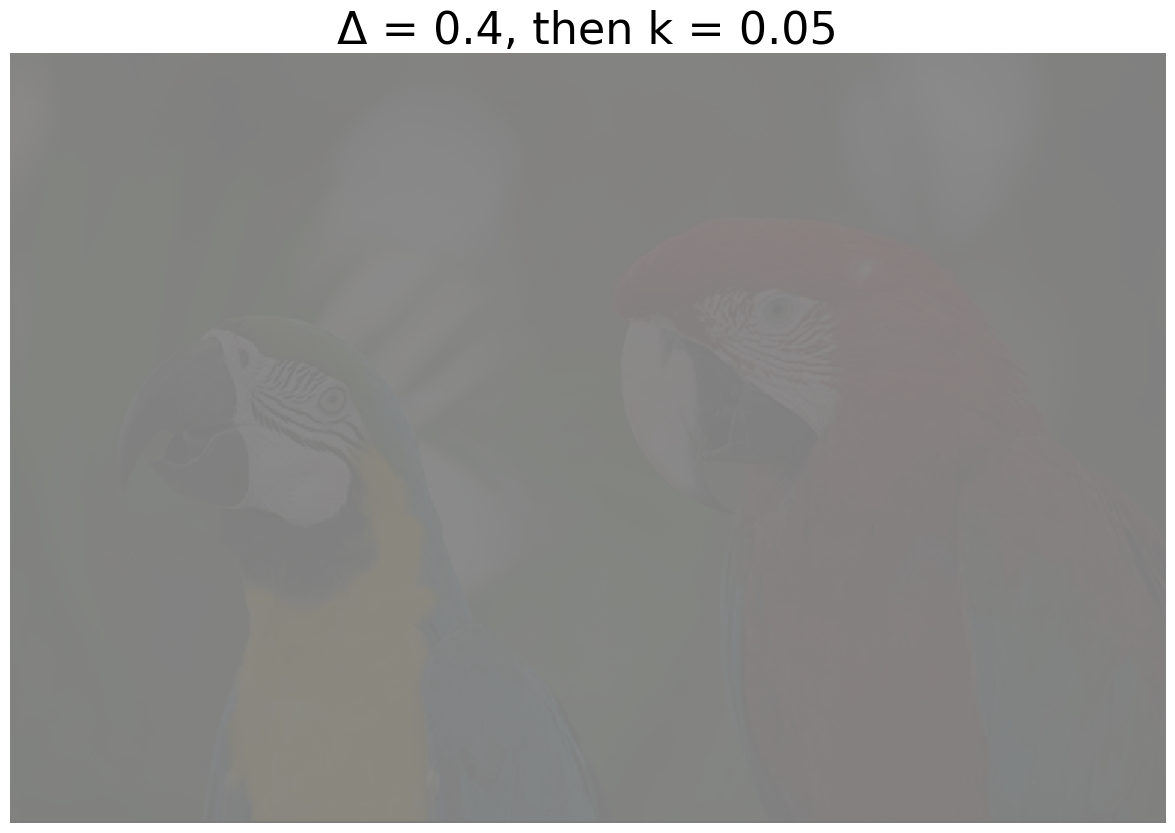

In [21]:
d = 0.4
k = 0.05
show(((kodim23 + d - 0.5) * k + 0.5).clip(0, 1), grid=False, title=f'Δ = {d}, then k = {k}', fontsize=32)

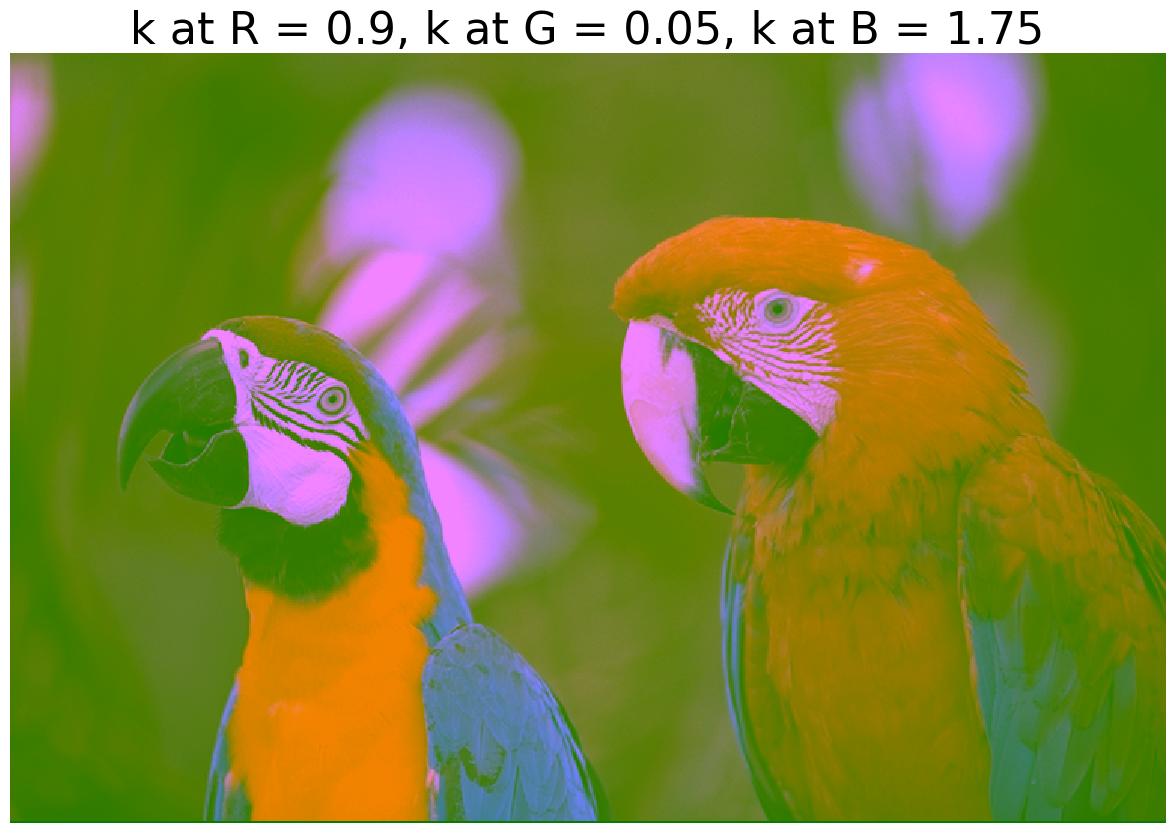

In [22]:
kodim23_filter = np.stack(
    [
        (kodim23[:, :, 0] - 0.5) * 0.9 + 0.5,
        (kodim23[:, :, 1] - 0.5) * 0.05 + 0.5,
        (kodim23[:, :, 2] - 0.5) * 1.75 + 0.5
    ],
    axis=-1
).clip(0, 1)
show(kodim23_filter, grid=False, title='k at R = 0.9, k at G = 0.05, k at B = 1.75', fontsize=32)

\begin{equation}
\begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix}
+
n \cdot
\begin{pmatrix}
1 & 1 \\
1 & 1
\end{pmatrix}
=
\begin{pmatrix}
a_{11} + n & a_{12} + n \\
a_{21} + n & a_{22} + n
\end{pmatrix}
\end{equation}


$$
\begin{equation}
\Delta \cdot \mathbf{1} = \Delta \cdot \begin{pmatrix}
1 & 1 \\
1 & 1
\end{pmatrix} = \begin{pmatrix}
\Delta & \Delta \\
\Delta & \Delta
\end{pmatrix}
\end{equation}
$$

$$
\begin{equation}
A = \begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix}
\end{equation}
$$

$$
A + \Delta \text{  means:}
$$
$$
\begin{equation}
A + \Delta \cdot \mathbf{1} = \begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix} + \begin{pmatrix}
\Delta & \Delta \\
\Delta & \Delta
\end{pmatrix} = \begin{pmatrix}
a_{11} + \Delta & a_{12} + \Delta \\
a_{21} + \Delta & a_{22} + \Delta
\end{pmatrix}
\end{equation}
$$


# Inverse

$A^{\prime} = \mathbf{1} - A$

In [23]:
noise = np.random.normal(0, 0.01, grayscale_image.shape)
noisy = (grayscale_image + noise).clip(0, 1)
det_noisy = np.linalg.det(noisy)
print("Determinant of the noisy matrix:", det_noisy)
rank_noisy = np.linalg.matrix_rank(noisy)
print("Rank of the noisy matrix:", rank_noisy)
print("Noisy matrix:")
print(noisy)


Determinant of the noisy matrix: 1.7195477905698538e-07
Rank of the noisy matrix: 5
Noisy matrix:
[[0.00107262 0.24500803 0.47878112 0.2672312  0.        ]
 [0.24840248 0.49442502 0.7588765  0.50744924 0.24381748]
 [0.48887541 0.76440376 1.         0.74579302 0.49059341]
 [0.24847793 0.5161498  0.7519749  0.50226995 0.25351556]
 [0.         0.24952918 0.49126916 0.24040648 0.00544311]]


In [24]:
def normalize(
    array: np.array,
    min_: float = None,
    max_: float = None
):
    if len(np.unique(array)) == 1:
        value = np.unique(array)[0]
        norm_value = 0.5
        if max_ != min_:
            norm_value = (value - min_) / (max_ - min_)
        return np.ones_like(array) * norm_value
    if min_ is None:
        min_ = array.min()
    if max_ is None:
        max_ = array.max()
    return (array - min_) / (max_ - min_)


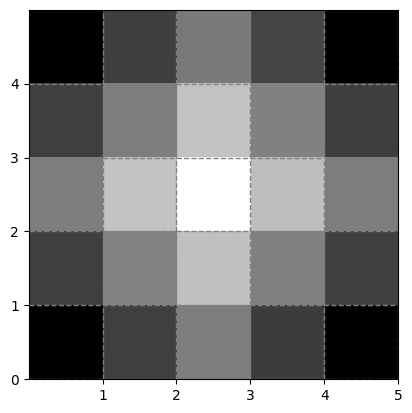

In [25]:
show(noisy)

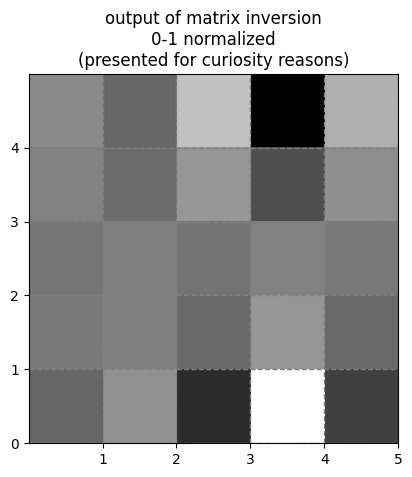

In [26]:
inverse = np.linalg.inv(noisy)
inverse = normalize(inverse)
show(inverse, title='output of matrix inversion\n0-1 normalized\n(presented for curiosity reasons)')

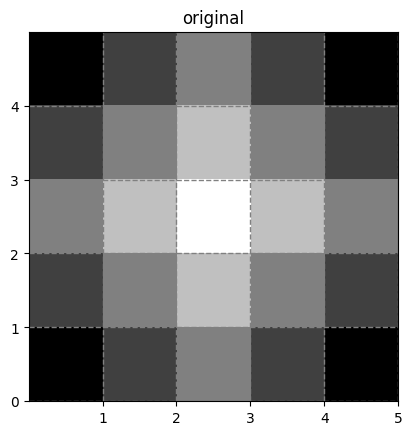

In [27]:
show(grayscale_image, title='original')

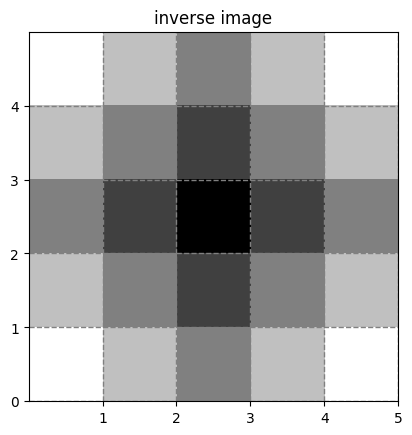

In [28]:
show(1-grayscale_image, title='inverse image')

In [29]:
convert_to_latex_matrix(inverse.round(2))

$
\begin{bmatrix}
0.54 & 0.41 & 0.76 & 0.0 & 0.69 \\
0.51 & 0.42 & 0.59 & 0.31 & 0.56 \\
0.46 & 0.5 & 0.46 & 0.51 & 0.47 \\
0.48 & 0.5 & 0.41 & 0.59 & 0.41 \\
0.4 & 0.57 & 0.17 & 1.0 & 0.25 \\
\end{bmatrix}
$


$
A^{\prime} = 
\begin{bmatrix}
0.45 & 0.55 & 0.54 & 0.6 & 0.65 \\
0.0 & 0.52 & 0.46 & 0.79 & 1.0 \\
0.71 & 0.57 & 0.59 & 0.5 & 0.44 \\
0.81 & 0.57 & 0.6 & 0.46 & 0.36 \\
0.85 & 0.58 & 0.61 & 0.44 & 0.33 \\
\end{bmatrix}
$

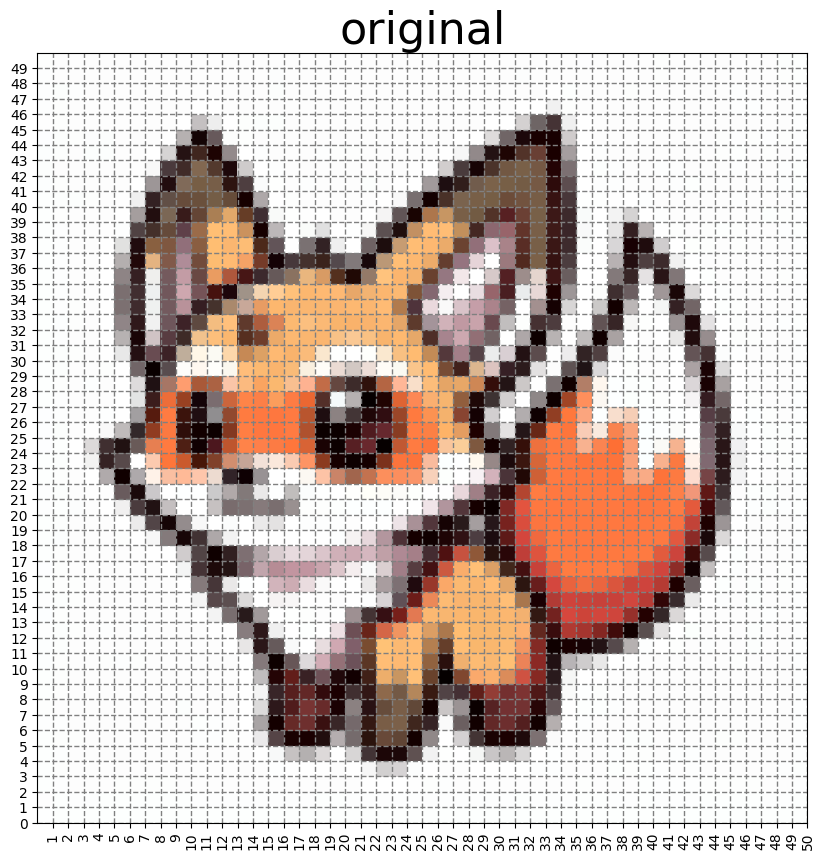

In [30]:
show(open_and_resize_image('medium_example.png', 50, 50)[:, :, :-1], grid=True, fontsize=32, title='original')

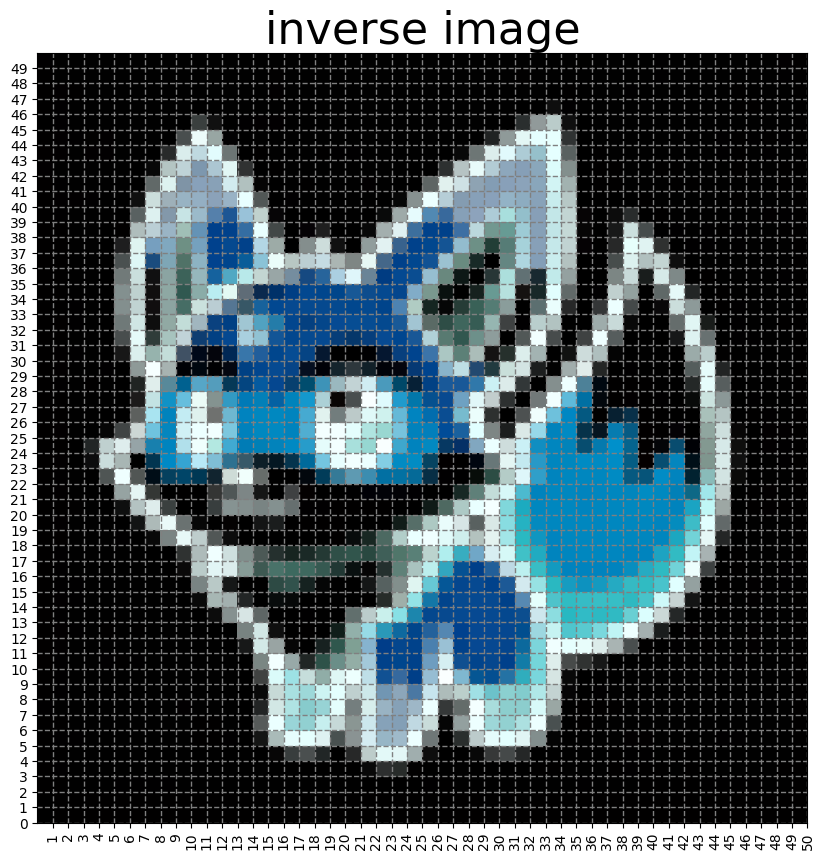

In [31]:
show(1 - open_and_resize_image('medium_example.png', 50, 50)[:, :, :-1], grid=True, fontsize=32, title='inverse image')

# Scale

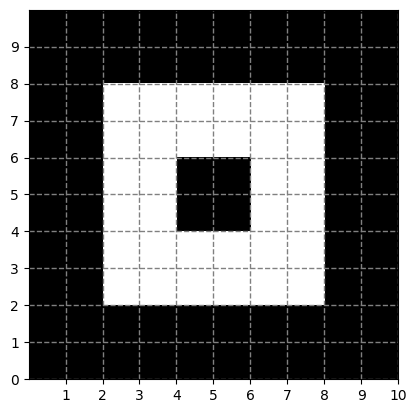

In [34]:
def scale(image, N):
    original_height, original_width = image.shape
    scaled_image = np.zeros((original_height * N, original_width * N), dtype=image.dtype)

    for i in range(original_height):
        for j in range(original_width):
            scaled_image[i*N:(i+1)*N, j*N:(j+1)*N] = image[i, j]

    return scaled_image

scaled_image = scale(image, 2)
show(scaled_image)


In [35]:
convert_to_latex_matrix(scaled_image)

$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$


$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$

\begin{equation}
A = \begin{pmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 1 & 0 & 1 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0
\end{pmatrix}
\end{equation}


\begin{equation}
A_{\text{scaled}} = \begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}
\end{equation}

\begin{equation}
a_{ij} = (1-\alpha) \cdot a_{i,j} + \alpha \cdot a_{i+1,j}
\end{equation}

\begin{equation}
A = \begin{pmatrix}
a_{11} & a_{12} & \ldots & a_{1n} \\
a_{21} & a_{22} & \ldots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \ldots & a_{mn}
\end{pmatrix}
\end{equation}

\begin{equation}
S = N \cdot I = N \cdot \begin{pmatrix}
1 & 0 & 0 & \ldots & 0 \\
0 & 1 & 0 & \ldots & 0 \\
0 & 0 & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & 1
\end{pmatrix}
= \begin{pmatrix}
N & 0 & 0 & \ldots & 0 \\
0 & N & 0 & \ldots & 0 \\
0 & 0 & N & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & N
\end{pmatrix}
\end{equation}

\begin{equation}
A_{\text{scaled}} = S \cdot A
\end{equation}

\begin{equation}
S = \begin{pmatrix}
2 & 0 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 & 0 \\
0 & 0 & 2 & 0 & 0 \\
0 & 0 & 0 & 2 & 0 \\
0 & 0 & 0 & 0 & 2
\end{pmatrix}
\end{equation}

\begin{equation}
S = 2 \cdot I = 2 \cdot \begin{pmatrix}
1 & 0 & 0 & \ldots & 0 \\
0 & 1 & 0 & \ldots & 0 \\
0 & 0 & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & 1
\end{pmatrix}
\end{equation}


\begin{equation}
A_{\text{scaled}} = \begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}
\end{equation}



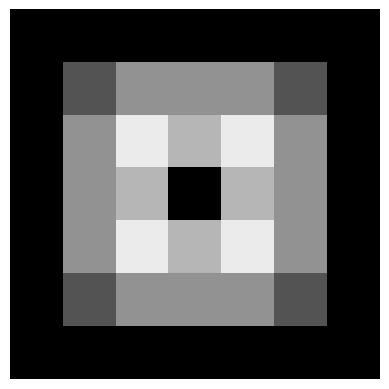

In [44]:
import numpy as np

def scale(image, N):
    original_height, original_width = image.shape
    new_height, new_width = int(original_height * N), int(original_width * N)
    scaled_image = np.zeros((new_height, new_width))

    for i in range(new_height):
        for j in range(new_width):
            x = (j + 0.5) * (original_width / new_width) - 0.5
            y = (i + 0.5) * (original_height / new_height) - 0.5
            x0, y0 = int(np.floor(x)), int(np.floor(y))
            x1, y1 = min(x0 + 1, original_width - 1), min(y0 + 1, original_height - 1)

            a, b = x - x0, y - y0

            scaled_image[i, j] = (1 - a) * (1 - b) * image[y0, x0] + \
                                 a * (1 - b) * image[y0, x1] + \
                                 (1 - a) * b * image[y1, x0] + \
                                 a * b * image[y1, x1]

    return scaled_image

N = 1.5 
scaled_image = scale(image, N)

show(scaled_image, grid=False)


$\text{Given the original matrix }$ $A \text{ with dimensions } (h \times w) \text{:}$

\begin{equation} A = \begin{pmatrix} a_{11} & a_{12} & \cdots & a_{1w} \\ a_{21} & a_{22} & \cdots & a_{2w} \\ \vdots & \vdots & \ddots & \vdots \\ a_{h1} & a_{h2} & \cdots & a_{hw} \end{pmatrix} \end{equation}

$\text{Compute target height and width after scaling by } k, \text{ round to nearest integer:}$

\begin{equation} h^{\prime} = \left\lfloor h \cdot k \right\rceil \end{equation}

\begin{equation} w^{\prime} = \left\lfloor w \cdot k \right\rceil \end{equation}

$\text{Initialize the target matrix:}$

\begin{equation} A^{\prime} = \mathbf{0}_{h^{\prime} \times w^{\prime}} = \begin{pmatrix} 0 & 0 & \cdots & 0 \\ 0 & 0 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & 0 \end{pmatrix} \end{equation}

$\text{We calculate new coordinates for each element in }$ $A^{\prime}$ $\text{ from the original matrix }$ $A \text{:}$

\begin{equation} x = (j + 0.5) \cdot \left(\frac{w}{w^{\prime}}\right) - 0.5 \ \text{(map new x-coordinate to original)} \end{equation}

\begin{equation} y = (i + 0.5) \cdot \left(\frac{h}{h^{\prime}}\right) - 0.5 \ \text{(map new y-coordinate to original)} \end{equation}

$\text{Next, we identify the surrounding pixels in the original matrix:}$

\begin{equation} x_0 = \left\lfloor x \right\rfloor, \quad y_0 = \left\lfloor y \right\rfloor \ \text{(find nearest lower integer)} \end{equation}

\begin{equation} x_1 = \min(x_0 + 1, w - 1), \quad y_1 = \min(y_0 + 1, h - 1) \ \text{(ensure within bounds)} \end{equation}

$\text{Then, we calculate the interpolation weights:}$

\begin{equation} a = x - x_0, \quad b = y - y_0 \ \text{(interpolation weights)} \end{equation}

$\text{Finally, we perform linear interpolation to compute the values of }$ $A^{\prime}$ $\text{ from }$ $A \text{:}$

\begin{equation} A^{\prime}[i, j] = (1 - a) \cdot (1 - b) \cdot A[y_0, x_0] + a \cdot (1 - b) \cdot A[y_0, x_1] + (1 - a) \cdot b \cdot A[y_1, x_0] + a \cdot b \cdot A[y_1, x_1] \ \text{(linear interpolation)} \end{equation}